In [1]:
import pandas as pd
import sqlalchemy as sql
import pandas as pd
from config import password
from config import connection
import psycopg2 as pg
import pandas.io.sql as psql

In [2]:
sql_connection=(f'postgresql://postgres:{password}@{connection}:5432/postgres')

In [3]:
engine=sql.create_engine(sql_connection)

In [4]:
engine.table_names()

C:\Users\erica\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['crime_dataset']

In [5]:
ml_df=pd.read_sql_query('select * from "crime_dataset"',con=engine)
ml_df

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Rape,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,24.0,...,NaN,3.0,7.0,NaN,23.0,18.0,2.0,2.0,1.0,169.0
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,87.0,...,NaN,4.0,25.0,NaN,35.0,73.0,1.0,4.0,1.0,452.0
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,267.0,...,5.0,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,95.0,...,1.0,3.0,9.0,2.0,21.0,20.0,NaN,5.0,NaN,464.0
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,61.0,...,1.0,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,91605,2993663.9,2.068394e+09,131516009.0,83290.0,35.942657,24833.641386,1579.013195,8.0,85.0,...,2.0,1.0,17.0,3.0,34.0,18.0,1.0,NaN,NaN,501.0
133,91606,3111975.0,2.432768e+09,130880558.0,84473.0,36.839878,28799.353012,1549.377411,5.0,66.0,...,2.0,NaN,9.0,3.0,24.0,13.0,1.0,8.0,NaN,330.0
134,91607,1185934.1,1.237387e+09,54131771.0,31101.0,38.131703,39786.095495,1740.515450,1.0,22.0,...,NaN,NaN,4.0,2.0,6.0,1.0,NaN,NaN,NaN,91.0
135,91608,171398.5,2.552632e+08,12431100.0,3767.0,45.500000,67763.000000,3300.000000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [6]:
#ml_df = ml_df[ml_df['Total_Crimes']>3]
#ml_df

In [7]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Zip                             137 non-null    int64  
 1   med_age_weight                  135 non-null    float64
 2   med_income_weight               135 non-null    float64
 3   month_housing_costs_weight      135 non-null    float64
 4   total_pop                       135 non-null    float64
 5   med_age                         135 non-null    float64
 6   med_income                      135 non-null    float64
 7   month_housing_costs             135 non-null    float64
 8   Against Family/Child            95 non-null     float64
 9   Aggravated Assault              117 non-null    float64
 10  Burglary                        108 non-null    float64
 11  Disorderly Conduct              41 non-null     float64
 12  Disturbing the Peace            9 no

In [8]:
ml_df = ml_df.fillna(0)
ml_df

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Rape,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,24.0,...,0.0,3.0,7.0,0.0,23.0,18.0,2.0,2.0,1.0,169.0
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,87.0,...,0.0,4.0,25.0,0.0,35.0,73.0,1.0,4.0,1.0,452.0
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,267.0,...,5.0,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,95.0,...,1.0,3.0,9.0,2.0,21.0,20.0,0.0,5.0,0.0,464.0
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,61.0,...,1.0,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,91605,2993663.9,2.068394e+09,131516009.0,83290.0,35.942657,24833.641386,1579.013195,8.0,85.0,...,2.0,1.0,17.0,3.0,34.0,18.0,1.0,0.0,0.0,501.0
133,91606,3111975.0,2.432768e+09,130880558.0,84473.0,36.839878,28799.353012,1549.377411,5.0,66.0,...,2.0,0.0,9.0,3.0,24.0,13.0,1.0,8.0,0.0,330.0
134,91607,1185934.1,1.237387e+09,54131771.0,31101.0,38.131703,39786.095495,1740.515450,1.0,22.0,...,0.0,0.0,4.0,2.0,6.0,1.0,0.0,0.0,0.0,91.0
135,91608,171398.5,2.552632e+08,12431100.0,3767.0,45.500000,67763.000000,3300.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [9]:
to_drop = [93599,93306,93350,93434,91911,92105,91762,91730,91705,90509,90009]

ml_df = ml_df[ml_df.Zip.isin(to_drop) == False]
ml_df

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Rape,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,24.0,...,0.0,3.0,7.0,0.0,23.0,18.0,2.0,2.0,1.0,169.0
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,87.0,...,0.0,4.0,25.0,0.0,35.0,73.0,1.0,4.0,1.0,452.0
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,267.0,...,5.0,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,95.0,...,1.0,3.0,9.0,2.0,21.0,20.0,0.0,5.0,0.0,464.0
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,61.0,...,1.0,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,91605,2993663.9,2.068394e+09,131516009.0,83290.0,35.942657,24833.641386,1579.013195,8.0,85.0,...,2.0,1.0,17.0,3.0,34.0,18.0,1.0,0.0,0.0,501.0
133,91606,3111975.0,2.432768e+09,130880558.0,84473.0,36.839878,28799.353012,1549.377411,5.0,66.0,...,2.0,0.0,9.0,3.0,24.0,13.0,1.0,8.0,0.0,330.0
134,91607,1185934.1,1.237387e+09,54131771.0,31101.0,38.131703,39786.095495,1740.515450,1.0,22.0,...,0.0,0.0,4.0,2.0,6.0,1.0,0.0,0.0,0.0,91.0
135,91608,171398.5,2.552632e+08,12431100.0,3767.0,45.500000,67763.000000,3300.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [10]:
binning = ml_df.Total_Crimes.value_counts()
binning.sort_values(ascending=False)
print(binning)

1.0      9
2.0      4
3.0      4
16.0     4
4.0      3
        ..
382.0    1
910.0    1
172.0    1
107.0    1
91.0     1
Name: Total_Crimes, Length: 115, dtype: int64


In [11]:
def binning(x):
    if x < 100.00:
        return '0-99'
    elif x < 300.00:
        return '100-299'
    elif x < 500.00:
        return '300-499'
    elif x > 500.00:
        return '500+'
    else: 
        return 'NaN'
    

In [12]:
ml_df['Crime_Ranges'] = ml_df['Total_Crimes'].apply(binning)
ml_df.head(20)

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Total_Crimes,Crime_Ranges
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,2.176663e+04,1285.489952,3.0,24.0,...,3.0,7.0,0.0,23.0,18.0,2.0,2.0,1.0,169.0,100-299
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,2.100771e+04,1374.133189,15.0,87.0,...,4.0,25.0,0.0,35.0,73.0,1.0,4.0,1.0,452.0,300-499
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,2.173335e+04,1351.830280,29.0,267.0,...,11.0,68.0,29.0,171.0,178.0,2.0,6.0,1.0,1695.0,500+
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,3.343417e+04,1692.421107,7.0,95.0,...,3.0,9.0,2.0,21.0,20.0,0.0,5.0,0.0,464.0,300-499
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,3.022371e+04,1577.258143,8.0,61.0,...,1.0,13.0,4.0,19.0,5.0,2.0,12.0,1.0,274.0,100-299
5,90006,3303160.5,2.081109e+09,114453697.0,95783.0,34.485874,2.172733e+04,1194.927043,3.0,121.0,...,4.0,33.0,9.0,44.0,23.0,2.0,0.0,0.0,724.0,500+
6,90007,2363958.7,1.468942e+09,95163664.0,78348.0,30.172547,1.874894e+04,1214.627865,5.0,75.0,...,4.0,31.0,5.0,67.0,62.0,5.0,5.0,1.0,534.0,500+
7,90008,1223573.6,1.148752e+09,51664810.0,28440.0,43.022982,4.039211e+04,1816.624824,8.0,75.0,...,0.0,7.0,1.0,24.0,32.0,7.0,12.0,5.0,304.0,300-499
8,90010,1762718.9,1.548477e+09,80177287.0,47517.0,37.096595,3.258785e+04,1687.338994,0.0,13.0,...,0.0,6.0,1.0,5.0,5.0,3.0,6.0,2.0,73.0,0-99
9,90011,3669041.2,2.557109e+09,162841212.0,124970.0,29.359376,2.046178e+04,1303.042426,38.0,180.0,...,4.0,34.0,13.0,119.0,98.0,3.0,8.0,2.0,1001.0,500+


In [13]:
binning = ml_df.Crime_Ranges.value_counts()
binning

0-99       57
100-299    33
300-499    26
500+       21
Name: Crime_Ranges, dtype: int64

In [14]:
ml_df = ml_df.drop(columns=['Total_Crimes'])

In [30]:
#  Against Family/Child            95 non-null     float64
# 9   Aggravated Assault              117 non-null    float64
# 10  Burglary                        108 non-null    float64
# 11  Disorderly Conduct              41 non-null     float64
# 12  Disturbing the Peace            9 non-null      float64
# 13  Driving Under Influence         116 non-null    float64
# 14  Drunkeness                      30 non-null     float64
# 15  Federal Offenses                14 non-null     float64
# 16  Forgery/Counterfeit             50 non-null     float64
# 17  Fraud/Embezzlement              85 non-null     float64
# 18  Gambling                        7 non-null      float64
# 19  Homicide                        69 non-null     float64
# 20  Larceny                         109 non-null    float64
# 21  Liquor Laws                     5 non-null      float64
# 22  Miscellaneous Other Violations  119 non-null    float64
# 23  Moving Traffic Violations       104 non-null    float64
# 24  Narcotic Drug Laws              115 non-null    float64
# 25  Non-Criminal Detention          18 non-null     float64
# 26  Other Assaults                  118 non-null    float64
#  27  Pre-Delinquency                 2 non-null      float64
 #28  Prostitution/Allied             49 non-null     float64
 #29  Rape                            63 non-null     float64
 #30  Receive Stolen Property         74 non-null     float64
 #31  Robbery                         110 non-null    float64
 #32  Sex (except rape/prst)          86 non-null     float64
 #33  Vehicle Theft                   109 non-null    float64
 #34  Weapon (carry/poss)             111 non-null    float64
 #35  General Mental Health Program   77 non-null     float64
 #36  General Mental Health Resource  96 non-null     float64
 #37  Substance Abuse Program         33 non-null     float64

In [31]:
ml_df['Aggravated Assault'] = ml_df['Aggravated Assault']/ml_df['total_pop'] 
ml_df['Burglary'] = ml_df['Burglary']/ml_df['total_pop']
ml_df['Disorderly Conduct'] = ml_df['Disorderly Conduct']/ml_df['total_pop']
ml_df['Disturbing the Peace'] = ml_df['Disturbing the Peace']/ml_df['total_pop']
ml_df['Driving Under Influence'] = ml_df['Driving Under Influence']/ml_df['total_pop']
ml_df['Drunkeness'] = ml_df['Drunkeness']/ml_df['total_pop']
ml_df['Federal Offenses'] = ml_df['Federal Offenses']/ml_df['total_pop']
ml_df['Forgery/Counterfeit'] = ml_df['Forgery/Counterfeit']/ml_df['total_pop']
ml_df['Fraud/Embezzlement'] = ml_df['Fraud/Embezzlement']/ml_df['total_pop']
ml_df['Gambling'] = ml_df['Gambling']/ml_df['total_pop']
ml_df['Homicide'] = ml_df['Homicide']/ml_df['total_pop']
ml_df['Larceny'] = ml_df['Larceny']/ml_df['total_pop']
ml_df['Liquor Laws'] = ml_df['Liquor Laws']/ml_df['total_pop']
ml_df['Miscellaneous Other Violations'] = ml_df['Miscellaneous Other Violations']/ml_df['total_pop']
ml_df['Moving Traffic Violations'] = ml_df['Moving Traffic Violations']/ml_df['total_pop']
ml_df['Narcotic Drug Laws'] = ml_df['Narcotic Drug Laws']/ml_df['total_pop']
ml_df['Non-Criminal Detention'] = ml_df['Non-Criminal Detention']/ml_df['total_pop']
ml_df['Other Assaults'] = ml_df['Other Assaults']/ml_df['total_pop']
ml_df['Pre-Delinquency'] = ml_df['Pre-Delinquency']/ml_df['total_pop']
ml_df['Prostitution/Allied'] = ml_df['Prostitution/Allied']/ml_df['total_pop']
ml_df['Rape'] = ml_df['Rape']/ml_df['total_pop']
ml_df['Receive Stolen Property'] = ml_df['Receive Stolen Property']/ml_df['total_pop']
ml_df['Robbery'] = ml_df['Robbery']/ml_df['total_pop']
ml_df['Sex (except rape/prst)'] = ml_df['Sex (except rape/prst)']/ml_df['total_pop']
ml_df['Vehicle Theft'] = ml_df['Vehicle Theft']/ml_df['total_pop']
ml_df['Weapon (carry/poss)'] = ml_df['Weapon (carry/poss)']/ml_df['total_pop']
ml_df['General Mental Health Program'] = ml_df['General Mental Health Program']/ml_df['total_pop']
ml_df['General Mental Health Resource'] = ml_df['General Mental Health Resource']/ml_df['total_pop']
ml_df['Substance Abuse Program'] = ml_df['Substance Abuse Program']/ml_df['total_pop']

In [37]:
ml_df.head()

,Zip,med_age_weight,med_income_weight,month_housing_costs_weight,total_pop,med_age,med_income,month_housing_costs,Against Family/Child,Aggravated Assault,...,Receive Stolen Property,Robbery,Sex (except rape/prst),Vehicle Theft,Weapon (carry/poss),General Mental Health Program,General Mental Health Resource,Substance Abuse Program,Crime_Ranges,Disturbing the Peace
0,90001,2549743.7,1.859720e+09,109830976.0,85439.0,29.842855,21766.634979,1285.489952,3.0,6.169846e-29,...,4.810085e-15,1.122353e-14,0.000000e+00,3.687732e-14,2.886051e-14,3.206724e-15,3.206724e-15,1.603362e-15,100-299,0.0
1,90002,1937620.4,1.426340e+09,93298147.0,67896.0,28.538064,21007.714563,1374.133189,15.0,8.880841e-28,...,1.277990e-14,7.987437e-14,0.000000e+00,1.118241e-13,2.332332e-13,3.194975e-15,1.277990e-14,3.194975e-15,300-499,0.0
2,90003,4043026.2,3.031933e+09,188588435.0,139506.0,28.981020,21733.352902,1351.830280,29.0,3.622046e-29,...,4.051483e-15,2.504553e-14,1.068118e-14,6.298215e-14,6.556036e-14,7.366333e-16,2.209900e-15,3.683166e-16,500+,0.0
3,90004,2865510.3,2.653570e+09,134322386.0,79367.0,36.104556,33434.173473,1692.421107,7.0,3.800877e-28,...,6.000692e-15,1.800208e-14,4.000462e-15,4.200485e-14,4.000462e-14,0.000000e+00,1.000115e-14,0.000000e+00,300-499,0.0
4,90005,2756055.6,2.265993e+09,118253352.0,74974.0,36.760152,30223.711860,1577.258143,8.0,3.434518e-28,...,2.372837e-15,3.084688e-14,9.491349e-15,4.508391e-14,1.186419e-14,4.745675e-15,2.847405e-14,2.372837e-15,100-299,0.0


In [39]:
import numpy as np
ml_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [40]:
ml_df = ml_df.fillna(0)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [47]:
y =ml_df.Crime_Ranges
X = ml_df.drop(columns=['Crime_Ranges'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

In [48]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
# Create a random forest classifier. *
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.652


In [51]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        0-99       0.78      0.82      0.80        17
     100-299       0.73      0.57      0.64        14
     300-499       0.40      0.50      0.44         8
        500+       0.57      0.57      0.57         7

    accuracy                           0.65        46
   macro avg       0.62      0.62      0.61        46
weighted avg       0.67      0.65      0.65        46



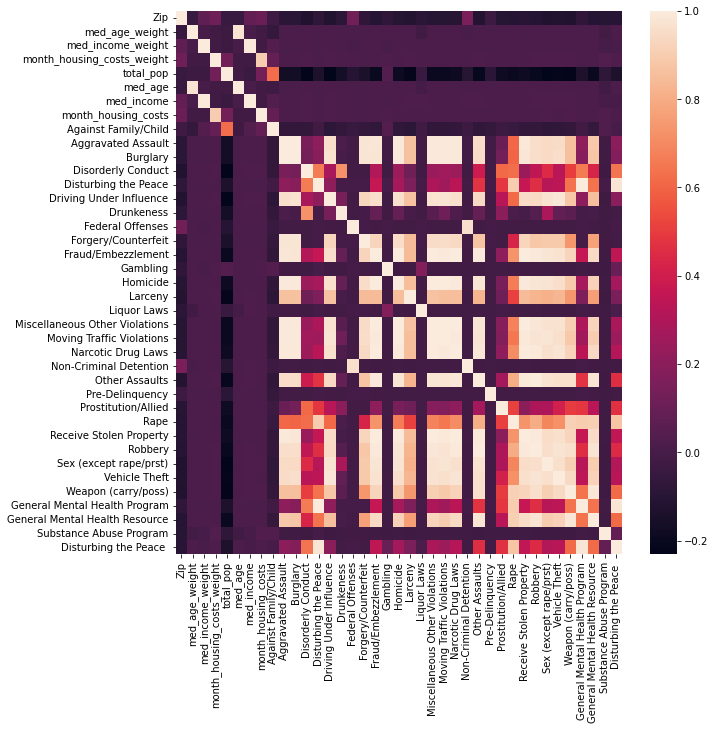

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(ml_df.corr())
plt.show()

In [54]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08983945342454322, 'Against Family/Child'),
 (0.051585295232568315, 'Receive Stolen Property'),
 (0.049123234476802634, 'total_pop'),
 (0.04901113044444282, 'med_age'),
 (0.04771789530906752, 'Weapon (carry/poss)'),
 (0.043235818834827154, 'med_income'),
 (0.04114959699858628, 'Fraud/Embezzlement'),
 (0.039252845852120515, 'Rape'),
 (0.03742761554049367, 'Larceny'),
 (0.03724450096868787, 'month_housing_costs'),
 (0.03719391343831003, 'Burglary'),
 (0.034872903957351174, 'Vehicle Theft'),
 (0.032245761043277754, 'Forgery/Counterfeit'),
 (0.02947934244474903, 'Zip'),
 (0.02832859781498037, 'Sex (except rape/prst)'),
 (0.027611024859623585, 'med_age_weight'),
 (0.027195278891555416, 'Homicide'),
 (0.026468364518214667, 'Other Assaults'),
 (0.026401425709573323, 'med_income_weight'),
 (0.02564959693128497, 'Moving Traffic Violations'),
 (0.023949919334854835, 'month_housing_costs_weight'),
 (0.020754594759241813, 'Drunkeness'),
 (0.020203419281440278, 'Driving Under Influence'),
 (0.0